In [48]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10

# train va testga bo'lamiz
train=CIFAR10(root='data', train=True, download=True)
test=CIFAR10(root='data', train=False , download=True)


Files already downloaded and verified
Files already downloaded and verified


In [49]:
train[100]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F95B149D4C0>, 8)

In [50]:
len(train)

50000

In [51]:
len(test)

10000

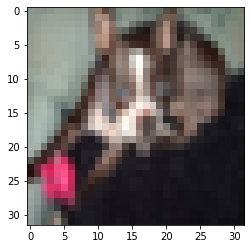

In [52]:
im=train[450][0]
plt.imshow(im)

In [53]:
import numpy as np
rasm_np=np.array(im)
print(rasm_np)

[[[140 150 141]
  [138 148 141]
  [136 146 137]
  ...
  [101 115 108]
  [117 128 116]
  [119 128 114]]

 [[144 153 144]
  [144 154 146]
  [150 159 148]
  ...
  [114 129 121]
  [118 130 118]
  [123 132 117]]

 [[143 152 141]
  [148 157 146]
  [155 163 152]
  ...
  [124 138 128]
  [127 135 122]
  [124 131 117]]

 ...

 [[148 159 155]
  [130 142 140]
  [102 113 112]
  ...
  [ 20  19  25]
  [ 21  20  26]
  [ 18  17  23]]

 [[144 155 151]
  [122 134 132]
  [ 91 104 101]
  ...
  [ 18  17  23]
  [ 20  19  25]
  [ 16  15  21]]

 [[138 150 146]
  [116 129 127]
  [ 85  96  93]
  ...
  [ 15  14  19]
  [ 17  16  21]
  [ 17  16  21]]]


In [54]:
rasm_np.shape

(32, 32, 3)

In [55]:
# transform
from torchvision import transforms as t
transform=t.Compose([t.ToTensor(),
                   t.Resize((32, 32), antialias=True)])
# datani boshqatda transform bn chaqiramiz

train_tr=CIFAR10(root='data', train=True, transform=transform, download=True)
test_tr=CIFAR10(root='data', train=False, transform=transform, download=True)


Files already downloaded and verified
Files already downloaded and verified


In [56]:
train_tr[100][0]

tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
         [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
         [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
         ...,
         [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
         [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
         [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
         [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
         [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
         ...,
         [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
         [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
         [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
         [0.9451, 0.9373, 0.9373,  ..., 0.8118, 0.8118, 0.8039],
         [0.9373, 0.9294, 0.9294,  ..., 0.8078, 0.8078, 0.

In [57]:
len(train_tr)

50000

`dataloader` 

In [58]:
train_data_load=torch.utils.data.DataLoader( dataset= train_tr,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=6)
len(train_data_load)

391

In [59]:
valid_data_load=torch.utils.data.DataLoader(dataset=test_tr,
                                           batch_size=128,
                                           shuffle=False,
                                           num_workers=6)
len(valid_data_load)

79

In [60]:
train_data_load

In [61]:
class My_first_model(torch.nn.Module):
    
    def __init__(self, in_fr, num_class):
        super(). __init__()
        
        self.linear_layer1=torch.nn.Linear(in_features=in_fr, out_features=in_fr//2)
        self.activation=torch.nn.ReLU()
        
        self.linear_layer2=torch.nn.Linear(in_features=in_fr//2, out_features=in_fr//4)
        self.out_linear=torch.nn.Linear(in_features=in_fr//4, out_features=num_class)
        
    def forward(self, inp):
        bs=inp.shape[0]
#         print(inp.shape)
        inp=inp.view(bs, -1)
#         print(inp.shape)
        
        
        inp=self.linear_layer1(inp)
        inp=self.activation(inp)
        inp=self.linear_layer2(inp)
        out=self.out_linear(inp)
        
        return out
        
        
        
model=My_first_model(in_fr=3*32*32, num_class=15)
raqam_0=torch.rand(10, 3, 32, 32)
torch.nn.functional.softmax(model(raqam_0), dim = 1) 
# model(raqam_0).shape
        

tensor([[0.0650, 0.0601, 0.0708, 0.0738, 0.0640, 0.0622, 0.0597, 0.0691, 0.0680,
         0.0727, 0.0687, 0.0586, 0.0656, 0.0718, 0.0700],
        [0.0714, 0.0578, 0.0671, 0.0709, 0.0689, 0.0654, 0.0618, 0.0694, 0.0694,
         0.0611, 0.0667, 0.0664, 0.0702, 0.0709, 0.0626],
        [0.0735, 0.0600, 0.0666, 0.0731, 0.0701, 0.0650, 0.0631, 0.0646, 0.0699,
         0.0642, 0.0664, 0.0610, 0.0660, 0.0718, 0.0647],
        [0.0676, 0.0624, 0.0655, 0.0749, 0.0678, 0.0640, 0.0666, 0.0659, 0.0721,
         0.0643, 0.0686, 0.0551, 0.0697, 0.0718, 0.0637],
        [0.0663, 0.0636, 0.0668, 0.0749, 0.0664, 0.0687, 0.0573, 0.0643, 0.0684,
         0.0674, 0.0664, 0.0635, 0.0656, 0.0732, 0.0671],
        [0.0673, 0.0590, 0.0693, 0.0700, 0.0643, 0.0639, 0.0592, 0.0705, 0.0755,
         0.0660, 0.0675, 0.0584, 0.0674, 0.0729, 0.0687],
        [0.0708, 0.0591, 0.0745, 0.0723, 0.0669, 0.0678, 0.0586, 0.0690, 0.0645,
         0.0646, 0.0653, 0.0618, 0.0649, 0.0731, 0.0668],
        [0.0744, 0.0594, 0.

In [62]:
# import torch.nn as nn
# import torch.nn.functional as f

# class my_class(nn.Module):
    
#     def __init__(self, in_fr, num_workers):
#         super(). __init__()
        
#         self.linear_layer1=nn.Linear(in_features=in_fr, out_features=in_fr//2)
#         self.activation=nn.ReLU()
        
#         self.linear_layer2=nn.Linear(in_features=in_fr//2, out_features=in_fr//4)
#         self.out_liner=nn.Linear(in_features=in_fr//4, out_features=num_workers)
        
#     def forward(self, inp):
        
#         bs=inp.shape[0]
#         print(inp.shape)
#         inp=inp.view(bs, -1)
#         print(inp.shape)
        
#         inp=self.linear_layer1(inp)
#         inp=self.activation(inp)
#         inp=self.linear_layer2(inp)
#         inp=self.activation(inp)
        
#         out=self.out_liner(inp)
        
#         return out

# model=my_class(in_fr=1*28*28, num_workers=10)
# number=torch.rand(10, 1, 28, 28)

# torch.nn.functional.softmax(model(number), dim=1)


In [63]:
for m in list(model.parameters()):
    print(m.shape)
    print(m.numel())

torch.Size([1536, 3072])
4718592
torch.Size([1536])
1536
torch.Size([768, 1536])
1179648
torch.Size([768])
768
torch.Size([15, 768])
11520
torch.Size([15])
15


In [64]:

epochs = 4
devise = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(devise)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.003)


In [65]:

print("train is starting .....")
for epoch in range(epochs):
    print(f"{epoch+1} - >  epoch boshlandi!\n")
    
    tr_acc_score, tr_total = 0, 0
    for ind, batch in enumerate(train_data_load):
        ims, gts = batch
#         print(ims.shape)
        
        img = ims.to(devise)
        gts = gts.to(devise)
        
        # predicts
        preds = model(img)
        loss = loss_fn(preds, gts)
        
        tr_total += ims.shape[0]
        pred_class = torch.argmax(preds, dim = 1)
        
        acc_score = (pred_class == gts).sum().item()
        tr_acc_score += acc_score
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model.eval() # modelni evaluation (baholash) mode ga o'tkizadi; trainable parameter larni yangilay olmaymiz.
    
    with torch.no_grad():
        val_epoch_loss = 0.
        val_total = 0.
        val_epoch_acc = 0.
        
        for ind, batch in enumerate(valid_data_load):
            img, gts = batch
            
            val_total += img.shape[0]
            
            img = img.to(devise)
            gts = gts.to(devise)
            
            pred = model(img)
            
            pred_class = torch.argmax(pred, dim = 1)
            val_acc = (pred_class == gts).sum().item()
            
            val_epoch_acc +=val_acc
            
            loss = loss_fn(pred, gts)
            val_epoch_loss += loss.item()
            
        print(f"{epoch + 1}-epoch tugadi!")
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print(f"{epoch + 1}-epochdagi natijalar:\n")
        print(f"{epoch + 1}-epochdagi train accuracy score      -> {tr_acc_score / tr_total}")
        print(f"{epoch + 1}-epochdagi validation loss     score -> {val_epoch_loss / len(valid_data_load)}")
        print(f"{epoch + 1}-epochdagi validation accuracy score -> {val_epoch_acc / val_total}\n")      
            
        
    

train is starting .....
1 -> epoch boshlandi!

1-epoch tugadi!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1-epochdagi natijalar:

1-epochdagi train accuracy score      -> 0.29198
1-epochdagi validation loss     score -> 1.843029749544361
1-epochdagi validation accuracy score -> 0.321

2 -> epoch boshlandi!

2-epoch tugadi!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2-epochdagi natijalar:

2-epochdagi train accuracy score      -> 0.35076
2-epochdagi validation loss     score -> 1.7626238563392735
2-epochdagi validation accuracy score -> 0.3571

3 -> epoch boshlandi!

3-epoch tugadi!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3-epochdagi natijalar:

3-epochdagi train accuracy score      -> 0.36806
3-epochdagi validation loss     score -> 1.7772243551061124
3-epochdagi validation accuracy score -> 0.3599

4 -> epoch boshlandi!

4-epoch tugadi!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4-epochdagi natijalar:

4-epochdagi train accuracy score